## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
a=-1
b=2
y= a*x + b

In [4]:
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

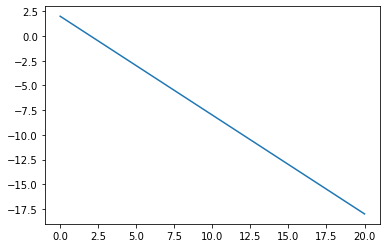

In [5]:
plt.plot(x,y);

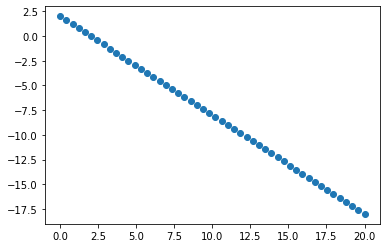

In [6]:
plt.scatter(x,y);

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

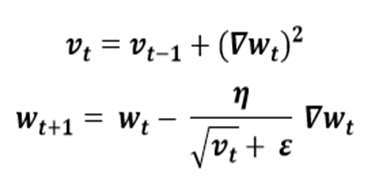

In [7]:
def J(x,y,theta_0,theta_1):
    m=len(x)
    cost = (1/(2*m) *((theta_0 + (theta_1 *x )) - y)**2).sum()
    return cost

In [8]:
# x ->input
# y -> target
# r -> learning rate

def Adagrad_gradiant(x, y, r, Epsilon, iterations):
    m= len(x)
    
    theta_0 = 0 
    theta_1 = 0
    
    theta_0_list = []
    theta_1_list = []
    
    cost_list = []
    
    hypothesis_list=[]
    
    
    #Adagrad
    
    # previous v
    v_theta_0 = 0
    v_theta_1 = 0
    
    
    for i in range (iterations):
        
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        cost = J(x,y,theta_0,theta_1)
        cost_list.append(cost)
        
        gradiant_theta_0 = (( h - y ).sum())/m
        gradiant_theta_1 = ((( h - y )* x) .sum())/m
        
        
        #current v
        v_theta_0 = v_theta_0 + (gradiant_theta_0)**2
        v_theta_1 = v_theta_1 + (gradiant_theta_1)**2
        
        #update thetas
        theta_0 = theta_0 - (r/(np.sqrt(v_theta_0)+Epsilon))* gradiant_theta_0
        theta_1 = theta_1 - (r/(np.sqrt(v_theta_1)+Epsilon))* gradiant_theta_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.001:
                break

            #if ther's no change in thetas so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list,i
    
    

In [9]:
r= 0.1
Epsilon = 1e-8
iterations= 150

In [10]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list, i = Adagrad_gradiant(x, y, r, Epsilon, iterations)

In [11]:
#iterations
i

61

In [12]:
#optimal theta0
theta_0 

-0.6273370591065074

In [13]:
#optimal theta_1
theta_1

-0.7721331555898167

In [14]:
y_pred =theta_0+ theta_1*x

In [15]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.944572630423619

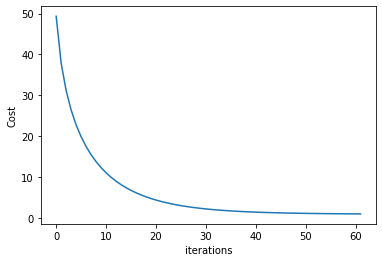

In [16]:
#plot loss and epochs
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

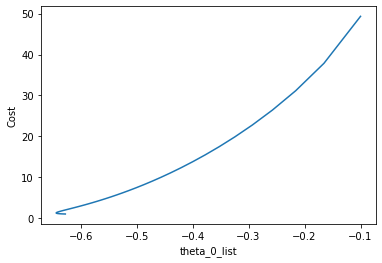

In [17]:
#  loss-theta0
plt.plot(theta_0_list, cost_list)
plt.xlabel('theta_0_list')
plt.ylabel('Cost');

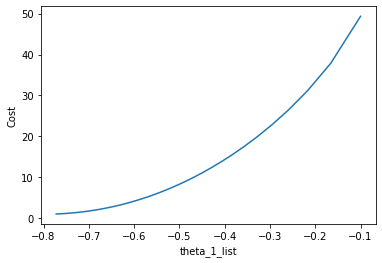

In [18]:
# loss-theta1
plt.plot(theta_1_list, cost_list)
plt.xlabel('theta_1_list')
plt.ylabel('Cost');

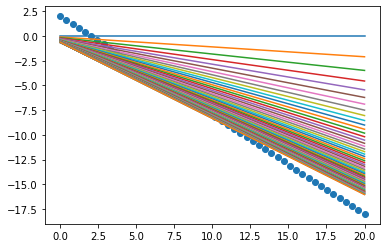

In [19]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

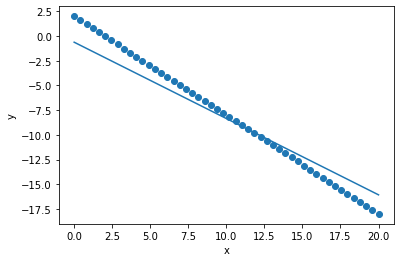

In [20]:
#best fit line
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('y');

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

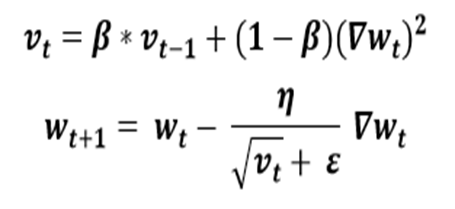

In [21]:
# x ->input
# y -> target
# r -> learning rate

def RMSProp_gradiant(x, y, r, beta,Epsilon, iterations):
    m= len(x)
    
    theta_0 = 0 
    theta_1 = 0
    
    theta_0_list = []
    theta_1_list = []
    
    cost_list = []
    
    hypothesis_list=[]
    
    
    #Adagrad
    
    # previous v
    v_theta_0 = 0
    v_theta_1 = 0
    
    
    for i in range (iterations):
        
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        cost = J(x,y,theta_0,theta_1)
        cost_list.append(cost)
        
        gradiant_theta_0 = (( h - y ).sum())/m
        gradiant_theta_1 = ((( h - y )* x) .sum())/m
        
        
        #current v
        v_theta_0 = (beta * v_theta_0) + (1-beta)*(gradiant_theta_0)**2
        v_theta_1 = (beta * v_theta_1) + (1-beta)*(gradiant_theta_1)**2
        
        #update thetas
        theta_0 = theta_0 - (r/(np.sqrt(v_theta_0)+Epsilon))* gradiant_theta_0
        theta_1 = theta_1 - (r/(np.sqrt(v_theta_1)+Epsilon))* gradiant_theta_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.001:
                break

            #if ther's no change in thetas so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list,i
    
    

In [22]:
r= 0.1
beta=0.9
Epsilon = 1e-8
iterations= 150

In [23]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list, i = RMSProp_gradiant(x, y, r, beta,Epsilon, iterations)

In [24]:
#iterations
i

65

In [25]:
#optimal theta0
theta_0 

1.8351721136509

In [26]:
#optimal theta_1
theta_1

-1.0311285874209362

In [27]:
y_pred =theta_0+ theta_1*x

In [28]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9924971690824342

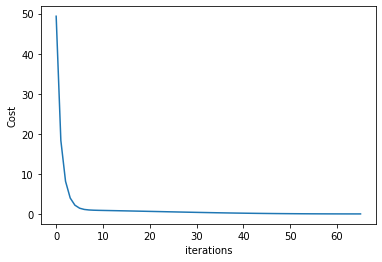

In [29]:
#plot loss and epochs
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

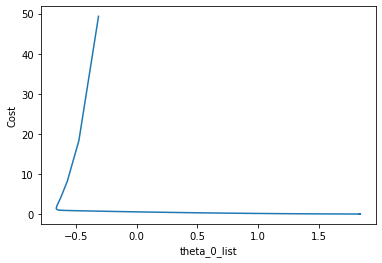

In [30]:
#  loss-theta0
plt.plot(theta_0_list, cost_list)
plt.xlabel('theta_0_list')
plt.ylabel('Cost');

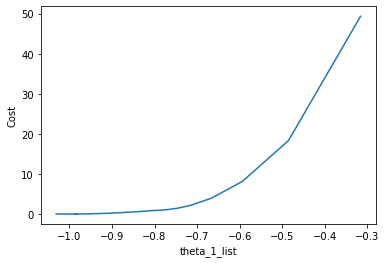

In [31]:
# loss-theta1
plt.plot(theta_1_list, cost_list)
plt.xlabel('theta_1_list')
plt.ylabel('Cost');

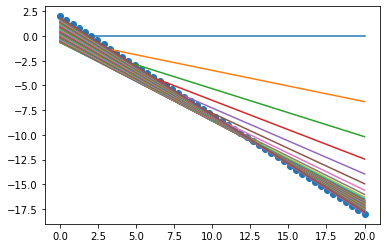

In [32]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

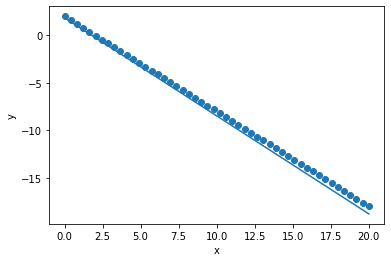

In [33]:
#best fit line
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('y');

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

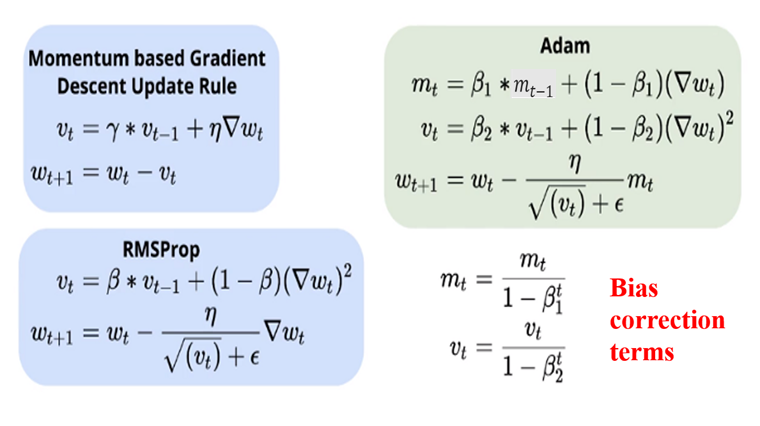

In [37]:
# x ->input
# y -> target
# r -> learning rate

def Adam_gradiant(x, y, r, beta1, beta2, Epsilon, iterations):
    m= len(x)
    
    theta_0 = 0 
    theta_1 = 0
    
    theta_0_list = []
    theta_1_list = []
    
    cost_list = []
    
    hypothesis_list=[]
    
    
    
    
    # previous v
    v_theta_0 = 0
    v_theta_1 = 0
    
    # previous m
    m_theta_0 = 0
    m_theta_1 = 0
    
    #gradiant_theta_0_list = []
    #gradiant_theta_1_list = []
    
    for i in range (iterations):
        
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        cost = J(x,y,theta_0,theta_1)
        cost_list.append(cost)
        
        gradiant_theta_0 = (( h - y ).sum())/m
        gradiant_theta_1 = ((( h - y )* x) .sum())/m
        
        #gradiant_theta_0_list.append(gradiant_theta_0)
        #gradiant_theta_1_list.append(gradiant_theta_1)
        
        #current m
        m_theta_0 = (beta1 * m_theta_0) + (1-beta1)*(gradiant_theta_0)
        m_theta_1 = (beta1 * m_theta_1) + (1-beta1)*(gradiant_theta_1)
    
        
        #current v
        v_theta_0 = (beta2 * v_theta_0) + (1-beta2)*(gradiant_theta_0)**2
        v_theta_1 = (beta2 * v_theta_1) + (1-beta2)*(gradiant_theta_1)**2
        
        #bais correction
        m_theta_0_bais = m_theta_0/(1-(beta1**(i+1)))
        m_theta_1_bais = m_theta_1/(1-(beta1**(i+1)))

        v_theta_0_bais = v_theta_0/(1-(beta2**(i+1)))
        v_theta_1_bais = v_theta_1/(1-(beta2**(i+1)))
        
        #update thetas
        theta_0 = theta_0 - (r/(np.sqrt(v_theta_0_bais)+Epsilon))* m_theta_0_bais
        theta_1 = theta_1 - (r/(np.sqrt(v_theta_1_bais)+Epsilon))* m_theta_1_bais
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        if i > 0:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in thetas so, break
            #if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.001:
            #   break
            
            if abs(np.linalg.norm([gradiant_theta_0,gradiant_theta_1]))< 0.0001:
                break
            
            
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list,i
    
    

In [38]:
r= 0.01
beta1=0.9
beta2=0.9
Epsilon = 1e-08
iterations= 1000

In [39]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list, i = Adam_gradiant(x, y, r, beta1, beta2, Epsilon, iterations)

In [40]:
#iterations
i

370

In [41]:
#optimal theta0
theta_0 

1.9681308008193008

In [42]:
#optimal theta_1
theta_1

-0.9972475443849017

In [43]:
y_pred =theta_0+ theta_1*x

In [44]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9999918799173635

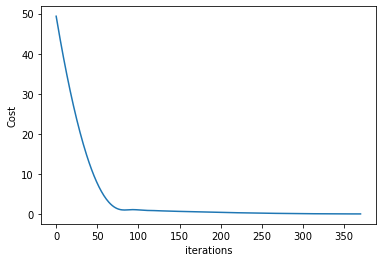

In [45]:
#plot loss and epochs
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

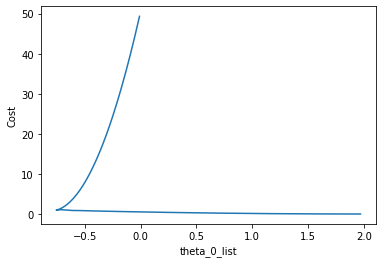

In [46]:
#  loss-theta0
plt.plot(theta_0_list, cost_list)
plt.xlabel('theta_0_list')
plt.ylabel('Cost');

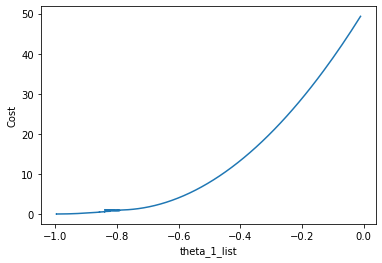

In [47]:
# loss-theta1
plt.plot(theta_1_list, cost_list)
plt.xlabel('theta_1_list')
plt.ylabel('Cost');

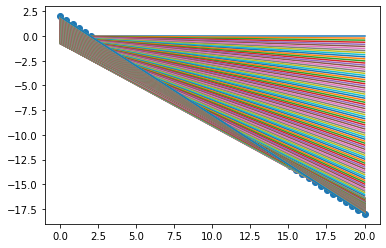

In [48]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

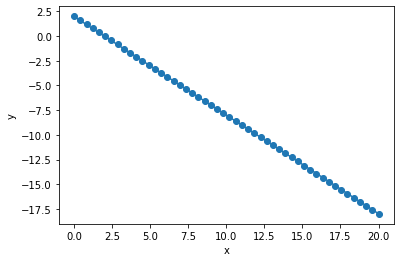

In [49]:
#best fit line
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('y');

## Congratulations 
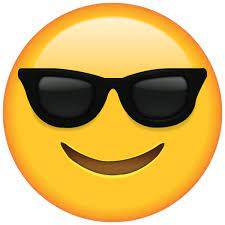